In [1]:
import gymnasium as gym
import ale_py
from pandas import Timestamp

from src.policies.dql_policy import DQLPolicy
from src.policies.random_policy import RandomPolicy
from src.networks.dqn import DQN

output_path = f'../outputs/random_policy/{int(Timestamp.now().timestamp())}'

gym.register_envs(ale_py)

env = gym.make('ALE/MsPacman-v5', render_mode="rgb_array")
env = gym.wrappers.RecordVideo(env, output_path, episode_trigger=lambda _: True)

obs_shape = env.observation_space.shape
n_actions = env.action_space.n
print(f'Observation shape: {obs_shape}')
print(f'Number of actions: {n_actions}')

Observation shape: (210, 160, 3)
Number of actions: 9


In [ ]:
policy = DQLPolicy(env, model=DQN(n_actions), path='../checkpoints/dqn/first_agent')
total_reward = policy.train(episodes=10_000, max_steps=10_000)

Total reward for episode 5: 730.0
Total reward for episode 6: 210.0


<Axes: xlabel='episode'>

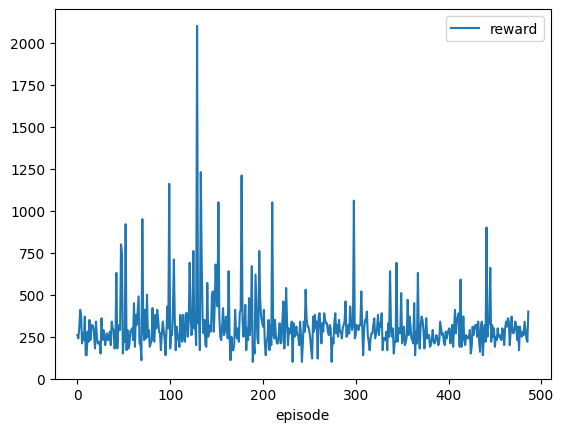

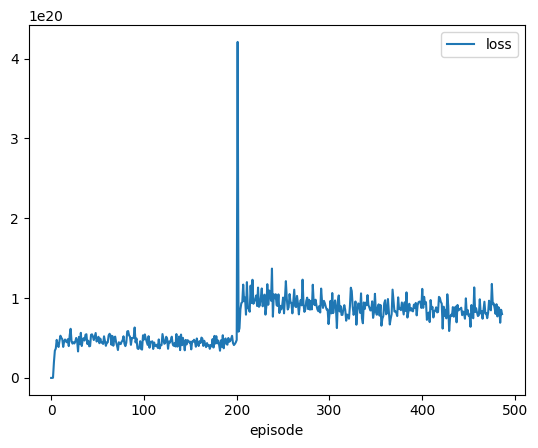

In [3]:
import pandas as pd

df = pd.read_csv(f'../checkpoints/dqn/first_agent/metrics.csv', index_col=False)
df.groupby('episode').sum().plot(y='reward')
df.groupby('episode')[['episode', 'loss']].mean().plot(y='loss')